<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-25 09:42:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  48.7MB/s    in 4.5s    

2025-01-25 09:42:24 (45.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [21]:
# Query the data for 'CompTotal'
query = "SELECT CompTotal FROM main"
df = pd.read_sql(query, conn)

# Remove any NaN values for 'CompTotal'
df = df.dropna(subset=['CompTotal'])

# Calculate Q1 and Q3 for IQR
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds using 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_filtered = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

filtered_stats = df_filtered['CompTotal'].describe()
print(filtered_stats)

count     27864.000000
mean     117182.605369
std       99970.300622
min           0.000000
25%       50000.000000
50%       88000.000000
75%      150000.000000
max      535000.000000
Name: CompTotal, dtype: float64


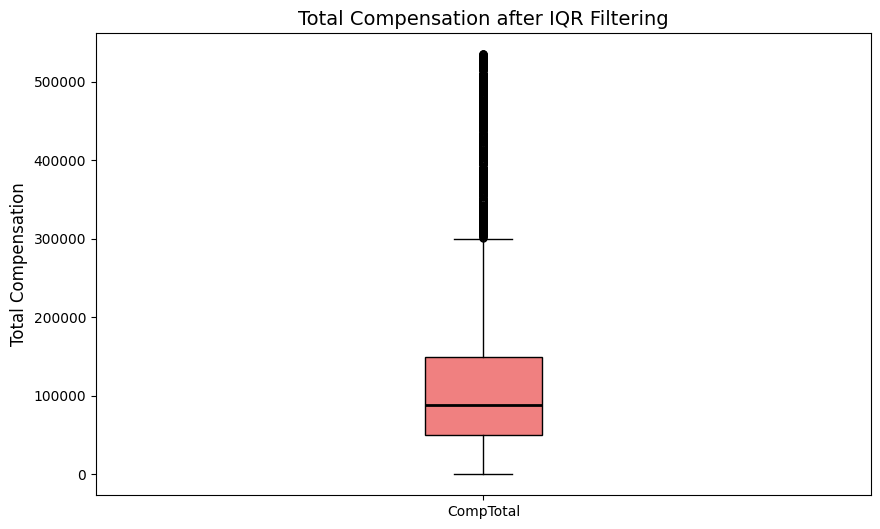

In [72]:
# your code goes here

# Plot the box plot for 'CompTotal' using matplotlib with vertical axes
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['CompTotal'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', color='black'),
            flierprops=dict(marker='o', color='red', markersize=5),
            medianprops=dict(color='black', linewidth=2))

# Set the title and labels
plt.title('Total Compensation after IQR Filtering', fontsize=14)
plt.ylabel('Total Compensation', fontsize=12)

# Set the x-axis labels
plt.xticks([1], ['CompTotal'])

plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [42]:
# Query the data for 'Age'
query = "SELECT Age FROM main"
df = pd.read_sql(query, conn)

# Print unique values and counts for the 'Age' column
print("Unique values and counts for Age column:")
print(df['Age'].value_counts())

Unique values and counts for Age column:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


In [50]:
# Mapping the age groups to numerical ranges
age_ranges = {
    'Under 18 years old': (12, 17),           
    '18-24 years old': (18, 24),             
    '25-34 years old': (25, 34),             
    '35-44 years old': (35, 44),             
    '45-54 years old': (45, 54),             
    '55-64 years old': (55, 64),             
    '65 years or older': (65, 70),          
    'Prefer not to say': None              
}

# Function to generate a random number based on age category
def generate_random_age(age_group):
    if age_group in age_ranges:
        if age_ranges[age_group] is not None:
            return np.random.randint(age_ranges[age_group][0], age_ranges[age_group][1] + 1)
    return np.nan

# Apply the function to the 'Age' column
df['AgeNumeric'] = df['Age'].apply(generate_random_age)

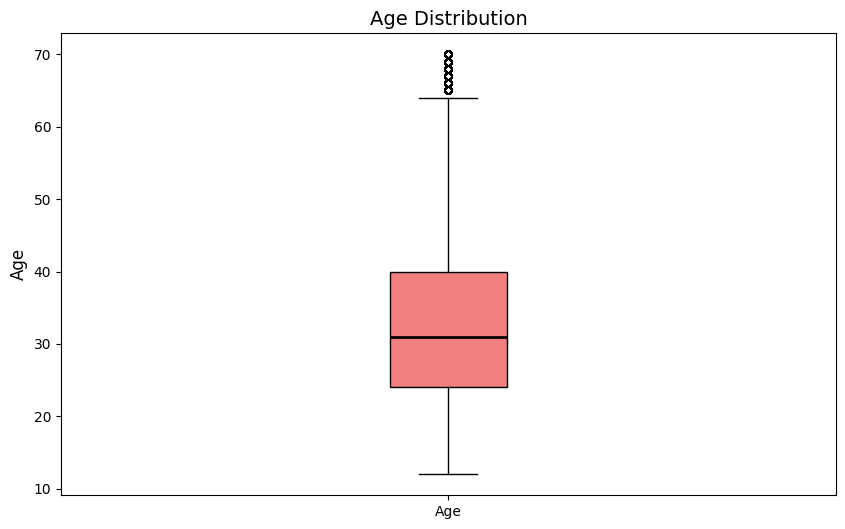

In [71]:
# your code goes here

# Plot the box plot for 'AgeNumeric'
plt.figure(figsize=(10, 6))
plt.boxplot(df['AgeNumeric'].dropna(), vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', color='black'),
            flierprops=dict(marker='o', color='red', markersize=5),
            medianprops=dict(color='black', linewidth=2))

# Set the title and labels
plt.title('Age Distribution', fontsize=14)
plt.ylabel('Age', fontsize=12)

# Set the x-axis labels
plt.xticks([1], ['Age'])

plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [52]:
# Query the data from the database
query = "SELECT Age, CompTotal FROM main"
data = pd.read_sql(query, conn)

# Check unique values in the 'Age' column and the sum of 'CompTotal'
unique_ages = data['Age'].unique()
sum_comp_total_by_age = data.groupby('Age')['CompTotal'].sum()

# Print results
print("Unique Age Values:", unique_ages)
print("\nSum of CompTotal by Age:")
print(sum_comp_total_by_age)

Unique Age Values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']

Sum of CompTotal by Age:
Age
18-24 years old        8.000000e+27
25-34 years old       1.000000e+150
35-44 years old        1.000000e+65
45-54 years old        1.785011e+10
55-64 years old        1.000000e+53
65 years or older      4.025330e+07
Prefer not to say      2.155301e+06
Under 18 years old     2.077031e+09
Name: CompTotal, dtype: float64


In [54]:
# Calculate IQR for CompTotal
Q1 = data['CompTotal'].quantile(0.25)
Q3 = data['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = data[(data['CompTotal'] >= lower_bound) & (data['CompTotal'] <= upper_bound)]

<Figure size 1000x600 with 0 Axes>

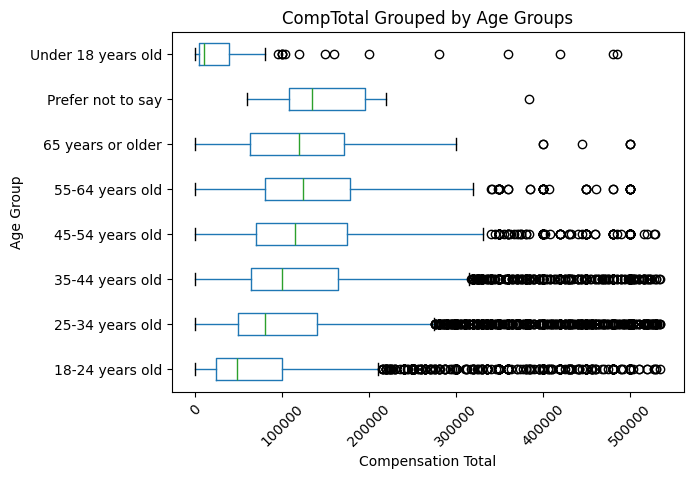

In [88]:
# your code goes here

# Plot the boxplot
plt.figure(figsize=(10,6))
filtered_data.boxplot(column='CompTotal', by='Age', grid=False, vert=False)
plt.title('CompTotal Grouped by Age Groups')
plt.suptitle('')
plt.xlabel('Compensation Total')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [58]:
# Query the data from the database for 'CompTotal' and 'JobSatPoints_6'
query = "SELECT JobSatPoints_6, CompTotal FROM main"
data_job_sat = pd.read_sql(query, conn)

# Check unique values in 'JobSatPoints_6' and sum of 'CompTotal' for each satisfaction level
unique_job_sat = data_job_sat['JobSatPoints_6'].unique()
sum_comp_total_by_job_sat = data_job_sat.groupby('JobSatPoints_6')['CompTotal'].sum()

# Print results
print("Unique Job Satisfaction Levels:", unique_job_sat)
print("\nSum of CompTotal by Job Satisfaction:")
print(sum_comp_total_by_job_sat)

Unique Job Satisfaction Levels: [   nan   0.    25.    30.    60.   100.    20.    50.    15.    10.
   5.    80.     8.    65.    90.    75.    35.    40.    33.    70.
  17.     7.    12.    13.     9.    21.    18.    95.     2.    45.
  34.    16.    78.    85.     1.    14.    31.    11.    23.    28.
  81.     6.25   6.    55.     3.    22.    42.     4.    89.    99.
  12.5   36.    27.    24.    19.    87.    88.    29.    33.33  33.3
  37.    39.    77.    68.    26.    98.    32.    66.    57.    82.
  94.    61.    43.    69.    76.    73.    17.5   46.    49.    52.
  97.    96.    67.    91.    86.    56.    41.    74.    51.    48.
  44.    64.    54.    63.  ]

Sum of CompTotal by Job Satisfaction:
JobSatPoints_6
0.0      1.000000e+150
1.0       4.649315e+08
2.0       2.132422e+08
3.0       4.734275e+07
4.0       3.075334e+08
             ...      
96.0      3.705600e+04
97.0      5.600000e+04
98.0      1.216000e+06
99.0      2.374168e+08
100.0     7.325382e+10
Name: Com

In [62]:
# Remove NaN values from the 'JobSatPoints_6' column
data_job_sat_cleaned = data_job_sat.dropna(subset=['JobSatPoints_6'])

# Round the 'JobSatPoints_6' values to whole numbers
data_job_sat_cleaned['JobSatPoints_6'] = data_job_sat_cleaned['JobSatPoints_6'].round()

# Check unique values and the sum of 'CompTotal' by rounded Job Satisfaction
unique_job_sat_cleaned = data_job_sat_cleaned['JobSatPoints_6'].unique()
sum_comp_total_by_job_sat_cleaned = data_job_sat_cleaned.groupby('JobSatPoints_6')['CompTotal'].sum()

print(sum_comp_total_by_job_sat_cleaned)

JobSatPoints_6
0.0      1.000000e+150
1.0       4.649315e+08
2.0       2.132422e+08
3.0       4.734275e+07
4.0       3.075334e+08
             ...      
96.0      3.705600e+04
97.0      5.600000e+04
98.0      1.216000e+06
99.0      2.374168e+08
100.0     7.325382e+10
Name: CompTotal, Length: 88, dtype: float64


/tmp/ipykernel_1695/3579212220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_job_sat_cleaned['JobSatPoints_6'] = data_job_sat_cleaned['JobSatPoints_6'].round()


In [65]:
# Define the bin edges for job satisfaction levels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define the labels for each bin
bin_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assign each JobSatPoints_6 to a bin
data_job_sat_cleaned['JobSatGroup'] = pd.cut(data_job_sat_cleaned['JobSatPoints_6'], bins=bins, labels=bin_labels, right=True)

# Check unique values in the new 'JobSatGroup' column and sum of 'CompTotal' by group
unique_job_sat_group = data_job_sat_cleaned['JobSatGroup'].unique()
sum_comp_total_by_job_sat_group = data_job_sat_cleaned.groupby('JobSatGroup')['CompTotal'].sum()

# Calculate IQR for CompTotal in the filtered dataset
Q1 = data_job_sat_cleaned['CompTotal'].quantile(0.25)
Q3 = data_job_sat_cleaned['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers based on CompTotal
filtered_data_job_sat = data_job_sat_cleaned[(data_job_sat_cleaned['CompTotal'] >= lower_bound) & 
                                              (data_job_sat_cleaned['CompTotal'] <= upper_bound)]

print(sum_comp_total_by_job_sat_group)

JobSatGroup
1-10      1.000000e+53
11-20     1.000000e+65
21-30     8.000000e+27
31-40     6.134107e+09
41-50     1.858820e+10
51-60     4.772157e+09
61-70     4.660589e+10
71-80     1.111148e+15
81-90     4.181141e+10
91-100    7.357672e+10
Name: CompTotal, dtype: float64


/tmp/ipykernel_1695/3867014633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_job_sat_cleaned['JobSatGroup'] = pd.cut(data_job_sat_cleaned['JobSatPoints_6'], bins=bins, labels=bin_labels, right=True)
/tmp/ipykernel_1695/3867014633.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_comp_total_by_job_sat_group = data_job_sat_cleaned.groupby('JobSatGroup')['CompTotal'].sum()


<Figure size 1000x600 with 0 Axes>

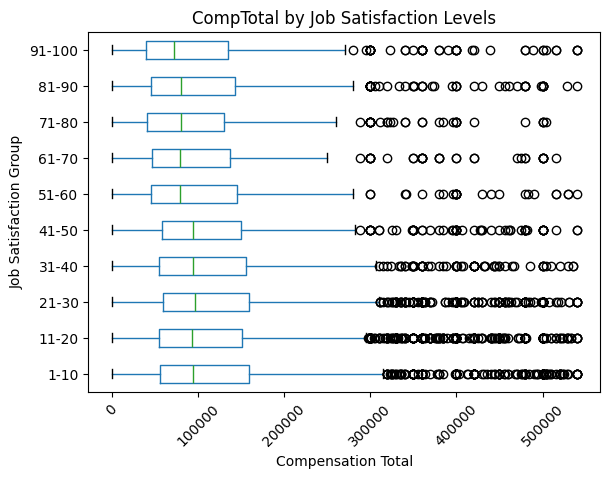

In [87]:
# your code goes here

# Plot the boxplot of 'CompTotal' grouped by the 'JobSatGroup' after filtering outliers
plt.figure(figsize=(10,6))
filtered_data_job_sat.boxplot(column='CompTotal', by='JobSatGroup', grid=False, vert=False)
plt.title('CompTotal by Job Satisfaction Levels')
plt.suptitle('')
plt.xlabel('Compensation Total')
plt.ylabel('Job Satisfaction Group')
plt.xticks(rotation=45)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [81]:
# Query the data from the database for 'DevType' and 'ConvertedCompYearly'
query_devtype = "SELECT DevType, ConvertedCompYearly FROM main"
data_devtype = pd.read_sql(query_devtype, conn)

# Get the top 5 most frequent developer roles
top_devtypes = data_devtype['DevType'].value_counts().head(5).index

# Filter the data to include only the top 5 developer roles
top_dev_data = data_devtype[data_devtype['DevType'].isin(top_devtypes)]

print("Top 5 Developer Roles:", top_devtypes)

Top 5 Developer Roles: Index(['Developer, full-stack', 'Developer, back-end', 'Student',
       'Developer, front-end',
       'Developer, desktop or enterprise applications'],
      dtype='object', name='DevType')


In [89]:
# Calculate IQR for 'ConvertedCompYearly'
Q1 = top_dev_data['ConvertedCompYearly'].quantile(0.25)
Q3 = top_dev_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_top_dev_data = top_dev_data[(top_dev_data['ConvertedCompYearly'] >= lower_bound) & 
                                      (top_dev_data['ConvertedCompYearly'] <= upper_bound)]

# Calculate statistics for 'ConvertedCompYearly' by 'DevType' on filtered data
comp_stats = filtered_top_dev_data.groupby('DevType')['ConvertedCompYearly'].describe()

# Print the statistics
print("Statistics of ConvertedCompYearly for Top 5 Developer Roles (Outliers Excluded):")
print(comp_stats)

Statistics of ConvertedCompYearly for Top 5 Developer Roles (Outliers Excluded):
                                                count          mean  \
DevType                                                               
Developer, back-end                            4472.0  71649.509168   
Developer, desktop or enterprise applications  1020.0  68953.588235   
Developer, front-end                           1381.0  55835.995655   
Developer, full-stack                          8002.0  67511.201700   
Student                                         139.0  23089.546763   

                                                        std  min       25%  \
DevType                                                                      
Developer, back-end                            50440.895070  1.0  32222.00   
Developer, desktop or enterprise applications  45253.771978  6.0  36457.75   
Developer, front-end                           45483.329088  1.0  17945.00   
Developer, full-stack          

<Figure size 1200x600 with 0 Axes>

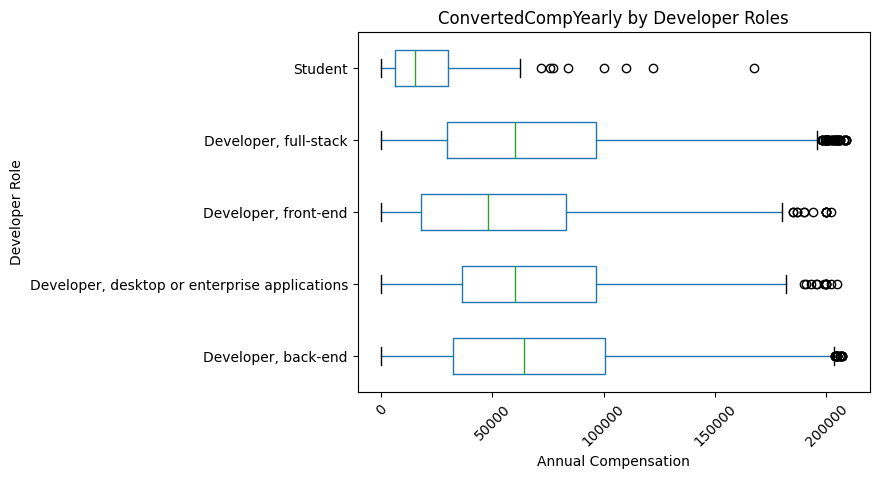

In [91]:
# your code goes here

# Plot the boxplot of 'ConvertedCompYearly' grouped by 'DevType' after filtering out outliers
plt.figure(figsize=(12,6))
filtered_top_dev_data.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, vert=False)
plt.title('ConvertedCompYearly by Developer Roles')
plt.suptitle('')
plt.xlabel('Annual Compensation')
plt.ylabel('Developer Role')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [92]:
# Query the data from the database for 'Country' and 'CompTotal'
query_country = "SELECT Country, CompTotal FROM main"
data_country = pd.read_sql(query_country, conn)

# Get the top 5 countries with the most respondents
top_countries = data_country['Country'].value_counts().head(5).index

# Filter the data to include only the top 5 countries
top_country_data = data_country[data_country['Country'].isin(top_countries)]

In [93]:
# Calculate IQR for 'CompTotal'
Q1 = top_country_data['CompTotal'].quantile(0.25)
Q3 = top_country_data['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_top_country_data = top_country_data[(top_country_data['CompTotal'] >= lower_bound) & 
                                             (top_country_data['CompTotal'] <= upper_bound)]

# Calculate statistics for 'CompTotal' by 'Country' on filtered data
comp_stats_country = filtered_top_country_data.groupby('Country')['CompTotal'].describe()

# Print the statistics
print("Statistics of CompTotal for Top 5 Countries (Outliers Excluded):")
print(comp_stats_country)

Statistics of CompTotal for Top 5 Countries (Outliers Excluded):
                                                     count           mean  \
Country                                                                     
Germany                                             2995.0   71530.554257   
India                                                300.0  187372.006667   
Ukraine                                             1148.0   61020.918990   
United Kingdom of Great Britain and Northern Ir...  1996.0   76417.810120   
United States of America                            6853.0  151650.580184   

                                                              std   min  \
Country                                                                   
Germany                                              37796.277511   0.0   
India                                               148049.364390   0.0   
Ukraine                                              64939.233613  15.0   
United Kingdom of Gr

<Figure size 1200x600 with 0 Axes>

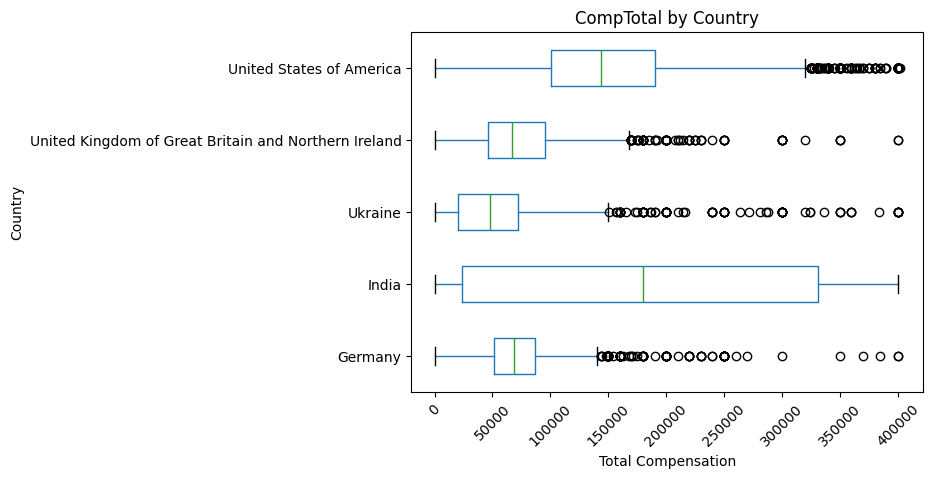

In [95]:
# your code goes here

# Plot the boxplot of 'CompTotal' grouped by 'Country' after filtering out outliers
plt.figure(figsize=(12,6))
filtered_top_country_data.boxplot(column='CompTotal', by='Country', grid=False, vert=False)
plt.title('CompTotal by Country')
plt.suptitle('')
plt.xlabel('Total Compensation')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [103]:
# Query the data from the database for 'EmploymentType' and 'CompTotal'
query_employment = "SELECT Employment, CompTotal FROM main"
data_employment = pd.read_sql(query_employment, conn)

# Clean Employment
data_employment['Employment'] = data_employment['Employment'].str.split(';').str[0]

# Get unique employment types after cleaning
unique_employment_types = data_employment['Employment'].unique()

# Summarize compensation for each employment type
comp_stats_employment = data_employment.groupby('Employment')['CompTotal'].describe()

print("\nStatistics of CompTotal by Employment Type:")
print(comp_stats_employment)


Statistics of CompTotal by Employment Type:
                                                      count           mean  \
Employment                                                                   
Employed, full-time                                 29231.0  3.421026e+145   
Employed, part-time                                   628.0   1.209074e+11   
I prefer not to say                                     0.0            NaN   
Independent contractor, freelancer, or self-emp...   2802.0   3.606358e+07   
Not employed, and not looking for work                  1.0   2.000000e+06   
Not employed, but looking for work                    165.0   4.715583e+10   
Retired                                                 1.0   4.300000e+04   
Student, full-time                                    613.0   9.315860e+06   
Student, part-time                                    299.0   6.362539e+06   

                                                              std        min  \
Employment      

In [105]:
# Calculate IQR for 'CompTotal'
Q1 = data_employment_filtered['CompTotal'].quantile(0.25)
Q3 = data_employment_filtered['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_employment_data = data_employment_filtered[(data_employment_filtered['CompTotal'] >= lower_bound) & 
                                                    (data_employment_filtered['CompTotal'] <= upper_bound)]

# Calculate statistics for 'CompTotal' by 'Employment' on filtered data
comp_stats_employment_filtered = filtered_employment_data.groupby('Employment')['CompTotal'].describe()

# Print the statistics
print("Statistics of CompTotal for Employment Types (Outliers Excluded):")
print(comp_stats_employment_filtered)

Statistics of CompTotal for Employment Types (Outliers Excluded):
                                                      count           mean  \
Employment                                                                   
Employed, full-time                                 23957.0  120002.428059   
Employed, part-time                                   581.0   85154.514630   
Independent contractor, freelancer, or self-emp...   2335.0  119347.450964   
Not employed, but looking for work                    136.0  101578.926471   
Retired                                                 1.0   43000.000000   
Student, full-time                                    573.0   63821.701571   
Student, part-time                                    281.0   41634.544484   

                                                              std      min  \
Employment                                                                   
Employed, full-time                                  98873.611828      0.0 

<Figure size 1200x600 with 0 Axes>

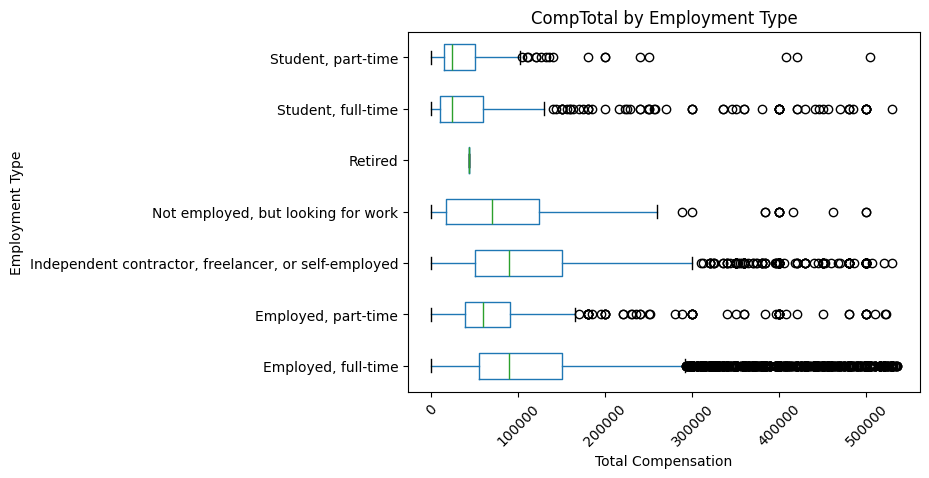

In [107]:
# your code goes here

# Plot the boxplot of 'CompTotal' grouped by 'Employment' after filtering out outliers
plt.figure(figsize=(12,6))
filtered_employment_data.boxplot(column='CompTotal', by='Employment', grid=False, vert=False)
plt.title('CompTotal by Employment Type')
plt.suptitle('')
plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [129]:
# Query the data from the database for 'YearsCodePro' and 'JobSatPoints_6'
query_job_satisfaction = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
data_job_satisfaction = pd.read_sql(query_job_satisfaction, conn)

# Remove rows with NaN in 'JobSatPoints_6' column
data_job_satisfaction_cleaned = data_job_satisfaction.dropna(subset=['JobSatPoints_6'])

# Round off 'JobSatPoints_6' to whole numbers
data_job_satisfaction_cleaned['JobSatPoints_6'] = data_job_satisfaction_cleaned['JobSatPoints_6'].round()

# Get unique job satisfaction levels after cleaning
unique_job_satisfaction_levels_cleaned = data_job_satisfaction_cleaned['JobSatPoints_6'].unique()

# Summarize 'YearsCodePro' for each 'JobSatPoints_6' level
years_codepro_stats_cleaned = data_job_satisfaction_cleaned.groupby('JobSatPoints_6')['YearsCodePro'].describe()

print(years_codepro_stats_cleaned)

               count unique top freq
JobSatPoints_6                      
0.0             7503     49   3  691
1.0               39     15   4    6
2.0               41     20   5    6
3.0               36     21   3    5
4.0               26     14   4    4
...              ...    ...  ..  ...
96.0               1      1   4    1
97.0               2      2   4    1
98.0               4      3   2    2
99.0              23     15   4    4
100.0            994     39   2  110

[88 rows x 4 columns]


/tmp/ipykernel_1695/2864982645.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_job_satisfaction_cleaned['JobSatPoints_6'] = data_job_satisfaction_cleaned['JobSatPoints_6'].round()


In [130]:
# Remove rows with NaN in 'YearsCodePro' column
data_job_satisfaction_cleaned = data_job_satisfaction_cleaned.dropna(subset=['YearsCodePro'])

# Convert 'Less than 1 year' to 1 and 'More than 50 years' to 51 in the 'YearsCodePro' column
data_job_satisfaction_cleaned['YearsCodePro'] = data_job_satisfaction_cleaned['YearsCodePro'].replace({'Less than 1 year': 1, 'More than 50 years': 51}).astype(float)

# Print the cleaned 'YearsCodePro' data
print("\nCleaned YearsCodePro Data (No NaN values):")
print(data_job_satisfaction_cleaned['YearsCodePro'])


Cleaned YearsCodePro Data (No NaN values):
1        17.0
12       12.0
15       27.0
18       10.0
20        1.0
         ... 
65168     2.0
65178    17.0
65265     2.0
65351     7.0
65435     2.0
Name: YearsCodePro, Length: 28619, dtype: float64


In [143]:
# Define bin edges for 'YearsCodePro'
bins = [0, 2, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]

# Define corresponding labels for each bin
bin_labels = ['2-5 years', '6-10 years', '11-15 years', '16-20 years', 
              '21-25 years', '26-30 years', '31-35 years', '36-40 years', '41-50 years', 
              '51-60 years', '60+ years']

# Create a new column 'YearsCodePro_Binned' with categorized values based on the bins
data_job_satisfaction_cleaned['YearsCodePro_Binned'] = pd.cut(data_job_satisfaction_cleaned['YearsCodePro'], bins=bins, labels=bin_labels, right=False)

# Print the data with the new binned column
print("\nData with Binned 'YearsCodePro':")
print(data_job_satisfaction_cleaned[['YearsCodePro', 'YearsCodePro_Binned']].head())


Data with Binned 'YearsCodePro':
    YearsCodePro YearsCodePro_Binned
1           17.0         21-25 years
12          12.0         16-20 years
15          27.0         31-35 years
18          10.0         16-20 years
20           1.0           2-5 years


<Figure size 1200x800 with 0 Axes>

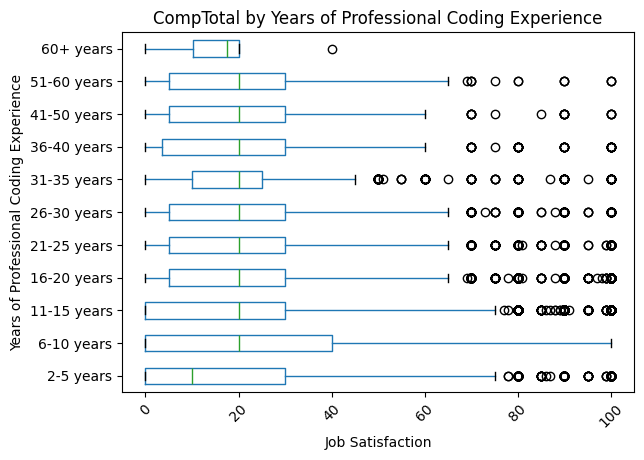

In [144]:
# Plot the boxplot of 'CompTotal' grouped by 'YearsCodePro_Binned'
plt.figure(figsize=(12,8))
data_job_satisfaction_cleaned.boxplot(column='JobSatPoints_6', by='YearsCodePro_Binned', grid=False, vert=False)
plt.title('CompTotal by Years of Professional Coding Experience')
plt.suptitle('')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
